In [1]:
import pandas as pd

file_path = 'sizes.csv'
data = pd.read_csv(file_path)

data.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [13]:
# Vérification des valeurs manquantes
data.isnull().sum()

# Suppression des lignes avec des valeurs manquantes
data.dropna(inplace=True)

# Suppression des doublons
data = data.drop_duplicates()

# Décrire les données pour identifier les incohérences
data.describe()

,weight,age,height
count,26971.000000,26971.000000,26971.000000
mean,63.717548,36.274925,165.850577
std,12.560271,10.792622,8.094971
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,62.000000,34.000000,165.100000
75%,70.000000,43.000000,172.720000
max,136.000000,117.000000,193.040000


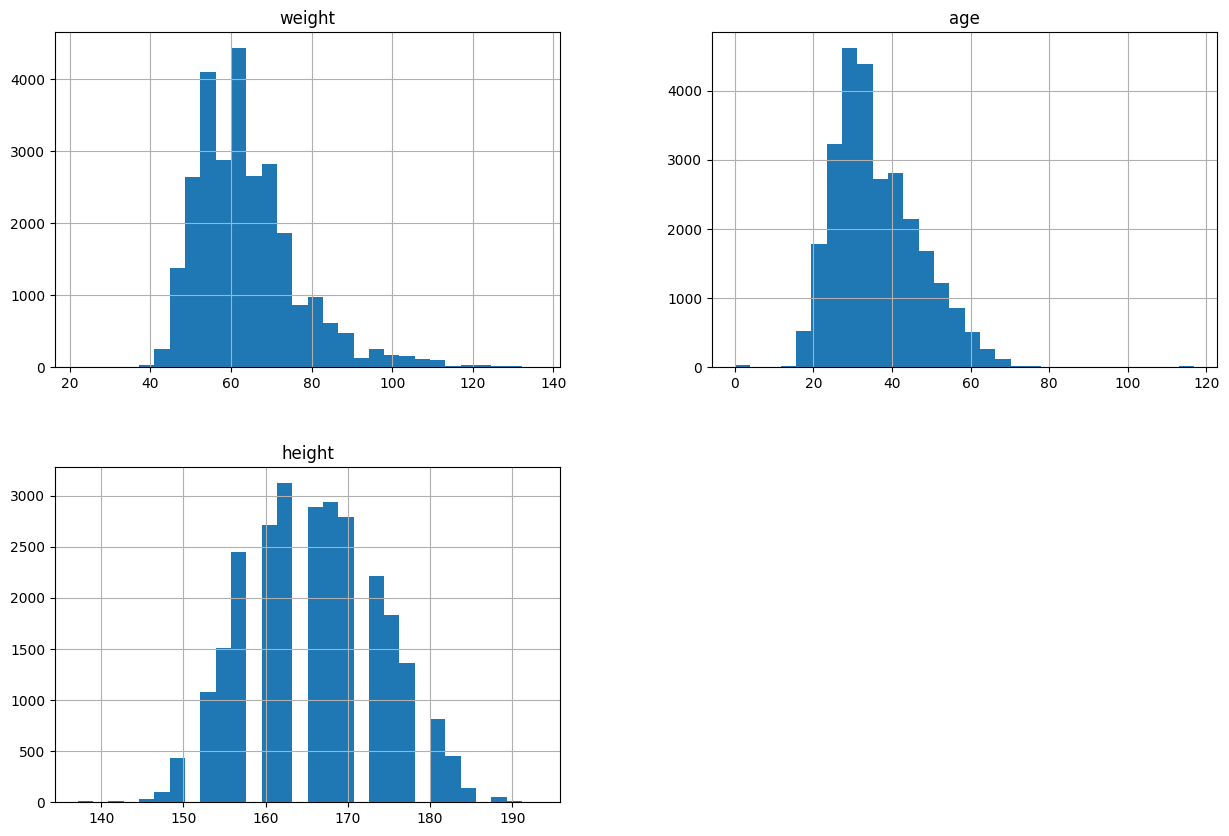

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des variables numériques
data.hist(bins=30, figsize=(15, 10))
plt.show()

**Objectif de la prédiction : **
prédire la taille d'un vêtement en fonction de ses autres propriétés afin de recommander des tailles appropriées aux clients en ligne, améliorant ainsi leur expérience d'achat.

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encodage des labels
label_encoder = LabelEncoder()
data['size_encoded'] = label_encoder.fit_transform(data['size'])

In [21]:
# Sélection des caractéristiques (features) et de la cible (target)
features = data[['weight', 'age', 'height']]
target = data['size_encoded']

In [22]:
from sklearn.model_selection import train_test_split

# Division du jeu de données
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entraîner un modèle de régression linéaire :

In [24]:
from sklearn.linear_model import LinearRegression

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Faire des prédictions
y_pred = model.predict(X_test)

Prediction pour un Homme agé de 34 pesant 70 kilo et mesurant 180cm


In [39]:
new_data = [[70, 34, 180]]

# Normaliser les nouvelles données
new_data_scaled = scaler.transform(new_data)

# Faire la prédiction
predicted_size_encoded = model.predict(new_data_scaled)
predicted_size_encoded = int(round(predicted_size_encoded[0]))

# Convertir la prédiction encodée en taille réelle
predicted_size = label_encoder.inverse_transform([predicted_size_encoded])

print(f'Taille prédite : {predicted_size[0]}')

Taille prédite : XL


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
# Prédire la taille d'un vêtement pour un homme mesurant 164 cm et pesant 56 kg

new_data_2 = [[56, 0, 164]]  # age is set to 0 as it's missing in the input
new_data_2_scaled = scaler.transform(new_data_2)
predicted_size_encoded_2 = model.predict(new_data_2_scaled)
predicted_size_encoded_2 = int(round(predicted_size_encoded_2[0]))
predicted_size_2 = label_encoder.inverse_transform([predicted_size_encoded_2])

print(f'Taille prédite : {predicted_size_2[0]}')

Taille prédite pour 164 cm et 56 kg : S


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [61]:
# Installation de Streamlit

!pip install streamlit pyngrok

In [68]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Charger les données et entraîner le modèle
file_path = 'sizes.csv'  # Assurez-vous que ce fichier est dans le même répertoire que ce script
data = pd.read_csv(file_path)

# Supprimer les lignes avec des valeurs manquantes
data.dropna(inplace=True)

# Encodage des labels
label_encoder = LabelEncoder()
data['size_encoded'] = label_encoder.fit_transform(data['size'])

# Sélection des caractéristiques et de la cible
features = data[['weight', 'age', 'height']]
target = data['size_encoded']

# Normalisation des données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(features_scaled, target)

# Fonction pour faire la prédiction
def predict_size(weight, age, height):
    new_data = np.array([[weight, age, height]])
    new_data_scaled = scaler.transform(new_data)
    predicted_size_encoded = model.predict(new_data_scaled)
    predicted_size_encoded = int(round(predicted_size_encoded[0]))
    predicted_size = label_encoder.inverse_transform([predicted_size_encoded])
    return predicted_size[0]

# Interface utilisateur avec Streamlit
st.title('Prédiction de la taille de vêtements')
st.write('Entrez les caractéristiques suivantes pour obtenir une prédiction de la taille de vêtements.')

weight = st.number_input('Poids (kg)', min_value=0)
age = st.number_input('Âge (années)', min_value=0)
height = st.number_input('Hauteur (cm)', min_value=0)

if st.button('Prédire la taille'):
    size = predict_size(weight, age, height)
    st.write(f'La taille prédite pour un homme de {weight} kg, {age} ans et {height} cm est : {size}')


Writing app.py


In [70]:
import threading
from pyngrok import ngrok
import subprocess

# Fermer tous les tunnels
ngrok.kill()

ngrok.set_auth_token('2ikYRkEJ55v1B04IIr6JqwBfO1n_H5MwX48yb7cDoUe3oP8J')

def run_streamlit():
    subprocess.run(['streamlit', 'run', 'app.py'])

# Lancement de Streamlit dans un thread
thread = threading.Thread(target=run_streamlit)
thread.start()

# Création d'un tunnel ngrok vers l'application Streamlit
public_url = ngrok.connect(8501, "http")
print(f'Application Streamlit accessible à l\'adresse : {public_url}')


Application Streamlit accessible à l'adresse : NgrokTunnel: "https://d999-35-224-178-96.ngrok-free.app" -> "http://localhost:8501"
